In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('C:/Users/AKASH NATH/Desktop/lyrics_generator/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/AKASH NATH/Desktop/lyrics_generator/data\One_Direction_Proper_Dataset.csv


# Data Processing

In [4]:
import pandas as pd

input_data = pd.read_csv("C:/Users/AKASH NATH/Desktop/lyrics_generator/data\One_Direction_Proper_Dataset.csv")
input_data

<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
C:\Users\AKASH NATH\AppData\Local\Temp\ipykernel_19880\302945635.py:3: SyntaxWarning: invalid escape sequence '\O'
  input_data = pd.read_csv("C:/Users/AKASH NATH/Desktop/lyrics_generator/data\One_Direction_Proper_Dataset.csv")


,S.No.,Song,Artist(s),Writer(s),Album(s),Year,Lyrics
0,1,"""18""",One Direction,"Ed Sheeran, Oliver Frank",Four,2014,[Verse 1: Harry]\nI got a heart and I got a so...
1,2,"""A.M.""",One Direction,"Niall Horan, Liam Payne, Harry Styles, Louis T...",Made in the A.M.,2015,[Intro: Harry]\nWon't you stay till the A.M.?\...
2,3,"""Act My Age""",One Direction,"John Ryan, Julian Bunetta, Ed Drewett",Four,2014,"[Intro]\nOne, two, three, four\n\n[Verse 1: Ni..."
3,4,"""Alive""",One Direction,"Julian Bunetta, John Ryan, Jamie Scott, Louis ...",Midnight Memories,2013,[Verse 1: Liam]\nMy mother told me I should go...
4,5,"""Another World""",One Direction,"Achraf Jannusi, Bilal Hajji, Eric Sanicola, Ge...",Up All Night,2011,"[Verse 1: Liam]\nIt's not me, it's not you, th..."
...,...,...,...,...,...,...,...
90,91,"""Where Do Broken Hearts Go""",One Direction,"Harry Styles, Julian Bunetta, Ruth-Anne Cunnin...",Four,2014,"[Verse 1: Niall, All]\nCounted all my mistakes..."
91,92,"""Why Don't We Go There""",One Direction,"Steve Robson, Claude Kelly, Wayne Hector, Loui...",Midnight Memories,2013,"[Verse 1: Harry Styles]\nI know you want, know..."
92,93,"""Wishing on a Star""",The X Factor Finalists 2011 featuring JLSand O...,Billie Rae Calvin,__,2011,[Chorus: Misha B]\nI'm wishin' on a star\nTo f...
93,94,"""Wolves""",One Direction,"Niall Horan, Liam Payne, Will Champlin, Andrew...",Made in the A.M.,2015,"[Intro: Harry, All]\nI hear them calling for y..."


In [5]:
import pandas as pd

data = pd.read_csv("C:/Users/AKASH NATH/Desktop/lyrics_generator/data\One_Direction_Proper_Dataset.csv")["Lyrics"]

lyrics_text = ""

for text in data:
    lyrics_text  += text

lyrics_text[:100]

<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
C:\Users\AKASH NATH\AppData\Local\Temp\ipykernel_19880\1434269382.py:3: SyntaxWarning: invalid escape sequence '\O'
  data = pd.read_csv("C:/Users/AKASH NATH/Desktop/lyrics_generator/data\One_Direction_Proper_Dataset.csv")["Lyrics"]


'[Verse 1: Harry]\nI got a heart and I got a soul\nBelieve me, I will use them both\nWe made a start, be'

In [6]:
import re
lyrics_text = re.sub(r'\[.*?\]', '', lyrics_text)
lyrics_text = lyrics_text.lower()
lyrics_text = re.sub(r'[^\w\s]', '', lyrics_text)

lyrics_text[:100]

'\ni got a heart and i got a soul\nbelieve me i will use them both\nwe made a start be it a false one i '

# Tokenization

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(char_level=False)
tokenizer.fit_on_texts([lyrics_text])

total_words = len(tokenizer.word_index) + 1
input_sequences = []
tokens = tokenizer.texts_to_sequences([lyrics_text])[0]

for i in range(1, len(tokens)):
    input_sequences.append(tokens[:i+1])

max_seq_length = 20
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_length, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]

In [9]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=total_words)

# Model Architecture

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 128
lstm_units = 256

model = Sequential([
    Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=max_seq_length-1),
    LSTM(lstm_units, return_sequences=True),
    Dropout(0.2),
    LSTM(lstm_units),
    Dropout(0.2),
    Dense(total_words, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\AKASH NATH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X, y, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 57s 127ms/step - accuracy: 0.0464 - loss: 6.0462 - val_accuracy: 0.0380 - val_loss: 5.7977
Epoch 2/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.0524 - loss: 5.5486 - val_accuracy: 0.0559 - val_loss: 5.7714
Epoch 3/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 50s 127ms/step - accuracy: 0.0617 - loss: 5.3451 - val_accuracy: 0.0727 - val_loss: 5.6781
Epoch 4/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.0751 - loss: 5.0687 - val_accuracy: 0.0872 - val_loss: 5.6099
Epoch 5/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 49s 125ms/step - accuracy: 0.1024 - loss: 4.8248 - val_accuracy: 0.0922 - val_loss: 5.5786
Epoch 6/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 51s 129ms/step - accuracy: 0.1261 - loss: 4.5712 - val_accuracy: 0.0988 - val_loss: 5.5510
Epoch 7/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 48s 121ms/step - accuracy: 0.1462 - loss: 4.3570 - val_accuracy: 0.0914 - val_loss: 5.5597
Epoch 8/100
393/393 ━━━━━━━━━━━━━━━━━━━━ 59s 150ms/step - accuracy: 0.1874 -

In [13]:
import numpy as np

def generate_text(seed_text, next_words, model, tokenizer, max_seq_length):
    output_text = seed_text
    line_length = 0 
    max_line_length = 10
    current_singer = None
    section_header = None

    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
        
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = tokenizer.index_word.get(predicted[0], "")  

        if output_word.startswith("[") and output_word.endswith("]"):
            section_header = output_word
            output_text += f"\n{section_header}\n"
            line_length = 0
            continue
        
        if ":" in output_word and output_word.endswith("]"):
            current_singer = output_word 
            output_text += f"\n{current_singer}\n"
            line_length = 0
            continue

        if line_length >= max_line_length or output_word == ".":
            output_text += "\n" + output_word
            line_length = 0
        else:
            output_text += " " + output_word
            line_length += 1
        
        seed_text += " " + output_word
    
    return output_text

seed_text = "Night Changes"
generated_text = generate_text(seed_text, 150, model, tokenizer, max_seq_length)
print(generated_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

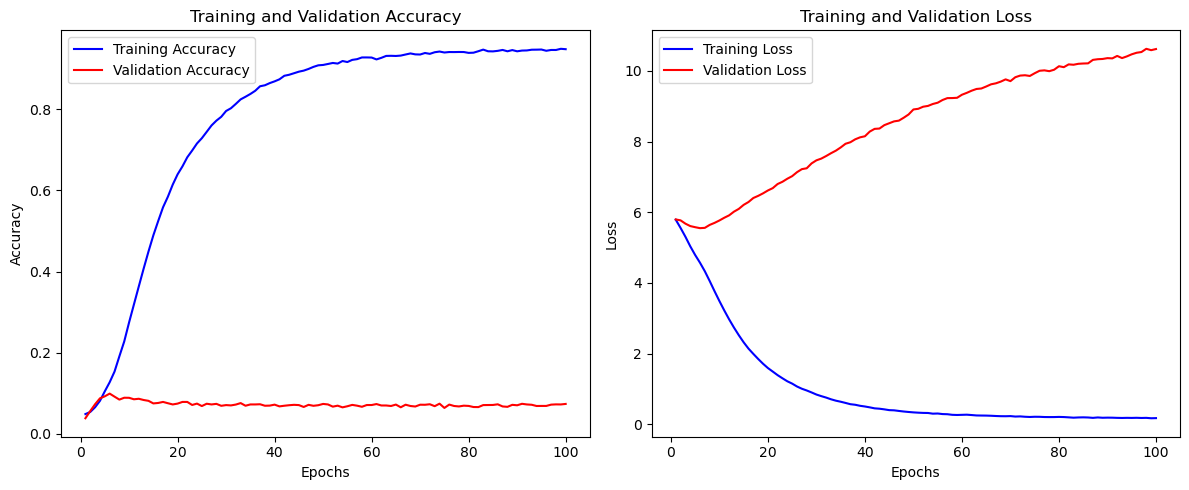

In [23]:
import matplotlib.pyplot as plt

# Assuming `history` is the output from model.fit()
def plot_training_history(history):
    # Extract data from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function after training
plot_training_history(history)

In [25]:
model.save('lyrics_gen.keras')